In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from translate import Translator

In [2]:
from pymystem3 import Mystem

In [3]:
sns.set()

In [4]:
data = pd.read_csv('/content/drive/MyDrive/rutube_hack/rutube_hack.csv')

In [5]:
data

,title,description,channel_title,video_name
0,Антон Протеинов I #1 IКак накачать все мышцы з...,В этой серии Легенда ворк-аута Антон Протеинов...,Антон ПРОТЕИНОВ,0.mp4
1,Антон Протеинов I #2 I Как выжать максимум из ...,В этой серии Легенда ворк аута Антон Протеинов...,Антон ПРОТЕИНОВ,1.mp4
2,Антон Протеинов I #3 I Как правильно заходить ...,В этом выпуске вы узнаете от Легенды мирового ...,Антон ПРОТЕИНОВ,2.mp4
3,Антон Протеинов I #4 I Самые эффективные упраж...,В этом выпуске Антон Протеинов познакомит вас ...,Антон ПРОТЕИНОВ,3.mp4
4,"Антон Протеинов I #5 I Как встать в 3 утра, чт...","В этом выпуске, легенда ворк аута Антон Протеи...",Антон ПРОТЕИНОВ,4.mp4
...,...,...,...,...
95,МультНайтШоу. Выпуск 5. В гостях Ивлеева. Прос...,МультНайтШоу – еженедельное юмористическое нар...,МультНайтШоу,95.mp4
96,МультНайтКлип. Удалите маркетплейсы,Специальное включение с «черной пятницы» от му...,МультНайтШоу,96.mp4
97,МультНайтШоу. Выпуск 6. В гостях Джокер. Наши ...,МультНайтШоу – еженедельное юмористическое нар...,МультНайтШоу,97.mp4
98,МультНайтШоу. Выпуск 7. В гостях Нагиев. Ю вон...,МультНайтШоу – еженедельное юмористическое нар...,МультНайтШоу,98.mp4


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          100 non-null    object
 1   description    99 non-null     object
 2   channel_title  100 non-null    object
 3   video_name     100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [7]:
data = data.dropna().reset_index(drop=True)

In [8]:
def clear_text(text):
    t = re.sub(r'[^а-яА-ЯёЁ ]', ' ', text)
    t = ' '.join(t.split())
    return t

In [9]:
def lemmatize_text(text):
    tokens = m.lemmatize(text.lower())
    tokens = [token for token in tokens if token != '\n']
    text = " ".join(tokens)

    return text

In [10]:
data['clear_description'] = data['description'].apply(clear_text)

In [11]:
data

,title,description,channel_title,video_name,clear_description
0,Антон Протеинов I #1 IКак накачать все мышцы з...,В этой серии Легенда ворк-аута Антон Протеинов...,Антон ПРОТЕИНОВ,0.mp4,В этой серии Легенда ворк аута Антон Протеинов...
1,Антон Протеинов I #2 I Как выжать максимум из ...,В этой серии Легенда ворк аута Антон Протеинов...,Антон ПРОТЕИНОВ,1.mp4,В этой серии Легенда ворк аута Антон Протеинов...
2,Антон Протеинов I #3 I Как правильно заходить ...,В этом выпуске вы узнаете от Легенды мирового ...,Антон ПРОТЕИНОВ,2.mp4,В этом выпуске вы узнаете от Легенды мирового ...
3,Антон Протеинов I #4 I Самые эффективные упраж...,В этом выпуске Антон Протеинов познакомит вас ...,Антон ПРОТЕИНОВ,3.mp4,В этом выпуске Антон Протеинов познакомит вас ...
4,"Антон Протеинов I #5 I Как встать в 3 утра, чт...","В этом выпуске, легенда ворк аута Антон Протеи...",Антон ПРОТЕИНОВ,4.mp4,В этом выпуске легенда ворк аута Антон Протеин...
...,...,...,...,...,...
94,МультНайтШоу. Выпуск 5. В гостях Ивлеева. Прос...,МультНайтШоу – еженедельное юмористическое нар...,МультНайтШоу,95.mp4,МультНайтШоу еженедельное юмористическое нарис...
95,МультНайтКлип. Удалите маркетплейсы,Специальное включение с «черной пятницы» от му...,МультНайтШоу,96.mp4,Специальное включение с черной пятницы от мужч...
96,МультНайтШоу. Выпуск 6. В гостях Джокер. Наши ...,МультНайтШоу – еженедельное юмористическое нар...,МультНайтШоу,97.mp4,МультНайтШоу еженедельное юмористическое нарис...
97,МультНайтШоу. Выпуск 7. В гостях Нагиев. Ю вон...,МультНайтШоу – еженедельное юмористическое нар...,МультНайтШоу,98.mp4,МультНайтШоу еженедельное юмористическое нарис...


In [12]:
data[data['clear_description']=='']

,title,description,channel_title,video_name,clear_description


In [13]:
data.duplicated().sum()

0

In [14]:
data['clear_description'] = data['clear_description'].str.lower()

In [15]:
data['symbols'] = data['clear_description'].apply(len)
data['tokens'] = data['clear_description'].str.split().apply(len)

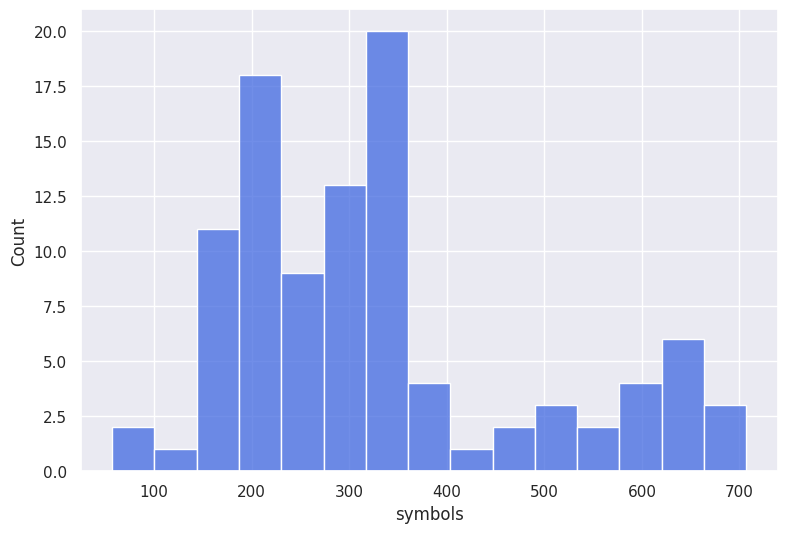

In [16]:
plt.figure(figsize=(9, 6))
sns.histplot(x=data['symbols'], color='royalblue', bins=15)
plt.show()

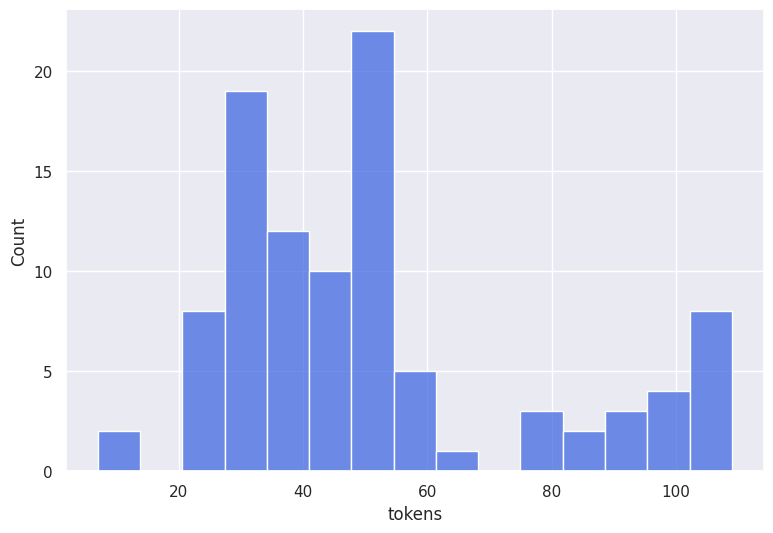

In [17]:
plt.figure(figsize=(9, 6))
sns.histplot(x=data['tokens'], color='royalblue', bins=15)
plt.show()

In [18]:
data = data[['clear_description', 'video_name']]

In [19]:
m = Mystem()

In [20]:
data['lemm_desc'] = data['clear_description'].apply(lemmatize_text)

<ipython-input-20-35a463778002>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lemm_desc'] = data['clear_description'].apply(lemmatize_text)


In [21]:
data

,clear_description,video_name,lemm_desc
0,в этой серии легенда ворк аута антон протеинов...,0.mp4,в этот серия легенда ворк аут анто...
1,в этой серии легенда ворк аута антон протеинов...,1.mp4,в этот серия легенда ворк аут анто...
2,в этом выпуске вы узнаете от легенды мирового ...,2.mp4,в этот выпуск вы узнавать от леген...
3,в этом выпуске антон протеинов познакомит вас ...,3.mp4,в этот выпуск антон протеин познаком...
4,в этом выпуске легенда ворк аута антон протеин...,4.mp4,в этот выпуск легенда ворк аут ант...
...,...,...,...
94,мультнайтшоу еженедельное юмористическое нарис...,95.mp4,мультнайтшоу еженедельный юмористический ...
95,специальное включение с черной пятницы от мужч...,96.mp4,специальный включение с черный пятница...
96,мультнайтшоу еженедельное юмористическое нарис...,97.mp4,мультнайтшоу еженедельный юмористический ...
97,мультнайтшоу еженедельное юмористическое нарис...,98.mp4,мультнайтшоу еженедельный юмористический ...


In [22]:
def prepare_text(data):

    def clear_text(text):
        t = re.sub(r'[^а-яА-ЯёЁ ]', ' ', text)
        t = ' '.join(t.split())
        return t

    def lemmatize_text(text):
        tokens = m.lemmatize(text.lower())
        tokens = [token for token in tokens if token != '\n']
        text = " ".join(tokens)

        return text

    def delete_garbage(string):
        string = string.split()
        for i in stopwords:
            if i in string:
                string.remove(i)
        return ' '.join(string)

    data = data.dropna().reset_index(drop=True)
    data['clear_description'] = data['description'].apply(clear_text)
    data['clear_description'] = data['clear_description'].str.lower()

    m = Mystem()
    data['lemm_desc'] = data['clear_description'].apply(lemmatize_text)
    data['lemm_clear_desc'] = data['lemm_desc'].apply(delete_garbage)

    return data

In [23]:
nltk.download('stopwords')
stopwords = stopwords.words("russian")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
data = pd.read_csv('/content/drive/MyDrive/rutube_hack/rutube_hack.csv')

In [25]:
df = prepare_text(data)

In [26]:
df.head()

,title,description,channel_title,video_name,clear_description,lemm_desc,lemm_clear_desc
0,Антон Протеинов I #1 IКак накачать все мышцы з...,В этой серии Легенда ворк-аута Антон Протеинов...,Антон ПРОТЕИНОВ,0.mp4,в этой серии легенда ворк аута антон протеинов...,в этот серия легенда ворк аут анто...,серия легенда ворк аут антон протеин познакоми...
1,Антон Протеинов I #2 I Как выжать максимум из ...,В этой серии Легенда ворк аута Антон Протеинов...,Антон ПРОТЕИНОВ,1.mp4,в этой серии легенда ворк аута антон протеинов...,в этот серия легенда ворк аут анто...,серия легенда ворк аут антон протеин познакоми...
2,Антон Протеинов I #3 I Как правильно заходить ...,В этом выпуске вы узнаете от Легенды мирового ...,Антон ПРОТЕИНОВ,2.mp4,в этом выпуске вы узнаете от легенды мирового ...,в этот выпуск вы узнавать от леген...,выпуск узнавать легенда мировой спорт нужно за...
3,Антон Протеинов I #4 I Самые эффективные упраж...,В этом выпуске Антон Протеинов познакомит вас ...,Антон ПРОТЕИНОВ,3.mp4,в этом выпуске антон протеинов познакомит вас ...,в этот выпуск антон протеин познаком...,выпуск антон протеин познакомить упражнение в ...
4,"Антон Протеинов I #5 I Как встать в 3 утра, чт...","В этом выпуске, легенда ворк аута Антон Протеи...",Антон ПРОТЕИНОВ,4.mp4,в этом выпуске легенда ворк аута антон протеин...,в этот выпуск легенда ворк аут ант...,выпуск легенда ворк аут антон протеин рассказы...


In [27]:
class TextPreparator:
    def __init__(self):
        self.m = Mystem()
        self.stopwords = None
        self.setup()

    def setup(self):
        self.translator = Translator(from_lang='ru', to_lang="en")
        nltk.download('stopwords')
        self.stopwords = stopwords.words("russian")
        garbage_words = ['подписываться', 'также', 'канал', 'комментарий', 'который', 'просмотр', 'сегодня']
        for i in garbage_words:
            self.stopwords.append(i)

    def clear_text(self, text: str) -> str:
        t = re.sub(r'[^а-яА-ЯёЁ ]', ' ', text)
        t = ' '.join(t.split())
        return t

    def lemmatize_text(self, text: str) -> str:
        remove_words = []
        tokens = self.m.lemmatize(text.lower())
        tokens = [token for token in tokens if token != '\n']
        text = " ".join(tokens)
        text = re.sub(r'\b\w{1,4}\b', '', text).split()
        for i in text:
            if i[-1] == 'ь': #or i[-2:] in ['ий', 'ый', 'ой', 'ся']
                remove_words.append(i)
        for i in remove_words:
            text.remove(i)
        text = ' '.join(text)

        return text

    def delete_garbage(self, string: str) -> str:
        string = string.split()
        for i in self.stopwords:
            if i in string:
                string.remove(i)
        return ' '.join(string)

    def process_single_text(self, raw_text: str) -> str:
        clear_text = self.clear_text(raw_text).lower()
        lemm_text = self.lemmatize_text(clear_text)
        lemm_clear_text = self.delete_garbage(lemm_text)
        return lemm_clear_text

    def write_to_file(self, text: str, file_path: str) -> None:
        with open(file_path, 'a') as f:
            f.write(text + ' ')
    def get_top_5_eng_words(self, file_path: str, top_amount: int=5) -> str:
        count_dict = {}
        with open('file.txt') as f:
            text = f.readlines()
        text = text[0]

        for i in text.split():
            if i in count_dict:
                count_dict[i] += 1
            else:
                count_dict[i] = 1

        sorted_words = sorted(count_dict.items(), key=lambda item: item[1], reverse=True)

        top = []
        for i in range(top_amount):
            top.append(sorted_words[i][0])
        top = ' '.join(top)

        eng_words = self.translator.translate(top)
        return eng_words

In [28]:
from nltk.corpus import stopwords

In [29]:
if __name__ == "__main__":
    tp = TextPreparator()
    txt = "В этой серии Легенда ворк-аута Антон Протеинов познакомит вас с новыми мышцами в человеческом организме, научит приседать, отжиматься и любить Россию."
    clr_text = tp.process_single_text(txt)
    print(clr_text)
    tp.write_to_file(clr_text, 'file.txt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


серия легенда антон протеин новый мышца человеческий организм отжиматься россия


In [30]:
tp.get_top_5_eng_words('file_txt')

'series legend anton protein new'

In [31]:
data

,title,description,channel_title,video_name
0,Антон Протеинов I #1 IКак накачать все мышцы з...,В этой серии Легенда ворк-аута Антон Протеинов...,Антон ПРОТЕИНОВ,0.mp4
1,Антон Протеинов I #2 I Как выжать максимум из ...,В этой серии Легенда ворк аута Антон Протеинов...,Антон ПРОТЕИНОВ,1.mp4
2,Антон Протеинов I #3 I Как правильно заходить ...,В этом выпуске вы узнаете от Легенды мирового ...,Антон ПРОТЕИНОВ,2.mp4
3,Антон Протеинов I #4 I Самые эффективные упраж...,В этом выпуске Антон Протеинов познакомит вас ...,Антон ПРОТЕИНОВ,3.mp4
4,"Антон Протеинов I #5 I Как встать в 3 утра, чт...","В этом выпуске, легенда ворк аута Антон Протеи...",Антон ПРОТЕИНОВ,4.mp4
...,...,...,...,...
95,МультНайтШоу. Выпуск 5. В гостях Ивлеева. Прос...,МультНайтШоу – еженедельное юмористическое нар...,МультНайтШоу,95.mp4
96,МультНайтКлип. Удалите маркетплейсы,Специальное включение с «черной пятницы» от му...,МультНайтШоу,96.mp4
97,МультНайтШоу. Выпуск 6. В гостях Джокер. Наши ...,МультНайтШоу – еженедельное юмористическое нар...,МультНайтШоу,97.mp4
98,МультНайтШоу. Выпуск 7. В гостях Нагиев. Ю вон...,МультНайтШоу – еженедельное юмористическое нар...,МультНайтШоу,98.mp4


In [32]:
true_cost_df = data[data['channel_title'] == 'Правильная цена']
true_cost_df

,title,description,channel_title,video_name
10,Правильная цена I #1,С вами Макс Климток и это шоу Правильная цена!...,Правильная цена,10.mp4
11,Правильная цена I #2,С вами Макс Климток и это шоу Правильная цена!...,Правильная цена,11.mp4
12,Правильная цена I #3,С вами Макс Климток и это шоу Правильная цена!...,Правильная цена,12.mp4
13,Правильная цена I #4,С вами Макс Климток и это шоу Правильная цена!...,Правильная цена,13.mp4
14,Правильная цена I #5,С вами Макс Климток и это шоу Правильная цена!...,Правильная цена,14.mp4
15,Правильная цена I Новогодний выпуск #6 / Лера ...,С вами Макс Климток и это шоу Правильная цена!...,Правильная цена,15.mp4
16,Правильная цена I #7,С вами Макс Климток и это шоу Правильная цена!...,Правильная цена,16.mp4
17,Правильная цена I #8,С вами Макс Климток и это шоу Правильная цена!...,Правильная цена,17.mp4
18,Правильная цена I #9,С вами Макс Климток и это шоу Правильная цена!...,Правильная цена,18.mp4
19,Правильная цена I #10,"В этот выпуске блогеры Мехрона, Саак Че За?, А...",Правильная цена,19.mp4


In [33]:
for i in range(len(true_cost_df)):
    text = tp.process_single_text(true_cost_df['description'].iloc[i])
    tp.write_to_file(text, 'file.txt')

In [34]:
tp.get_top_5_eng_words('file_txt')

'correct climate participant product service'

In [35]:
with open('file.txt') as f:
    lines = f.readlines()

In [36]:
lines = lines[0]

In [37]:
lines

'серия легенда антон протеин новый мышца человеческий организм отжиматься россия климток правильный участник правильный товар услуга ориентироваться руслан сложно елисей бендас климток правильный участник правильный товар услуга ориентироваться алиша бэмби эльза климток правильный участник правильный товар услуга ориентироваться бинет лизогубенко климток правильный участник правильный товар услуга ориентироваться настя ершов герман гласс климток правильный участник правильный товар услуга ориентироваться катюша кристи крайм климток правильный участник правильный товар услуга ориентироваться подруга изумруд серега климток правильный участник правильный товар услуга ориентироваться наташа гончаров сергей рахимов гусми климток правильный участник правильный товар услуга ориентироваться целовашкин краснов асадчий климток правильный участник правильный товар услуга файербол надежда гуськова куклин выпуск блогер мехрон несменный ведущий климток правильный различный предмет скорпион алина мол

In [38]:
count_dict = {}

In [39]:
for i in lines.split():
    if i in count_dict:
        count_dict[i] += 1
    else:
        count_dict[i] = 1

In [40]:
k = sorted(count_dict.items(), key=lambda item: item[1], reverse=True)

In [41]:
k

[('правильный', 19),
 ('климток', 10),
 ('участник', 9),
 ('товар', 9),
 ('услуга', 9),
 ('ориентироваться', 8),
 ('серия', 1),
 ('легенда', 1),
 ('антон', 1),
 ('протеин', 1),
 ('новый', 1),
 ('мышца', 1),
 ('человеческий', 1),
 ('организм', 1),
 ('отжиматься', 1),
 ('россия', 1),
 ('руслан', 1),
 ('сложно', 1),
 ('елисей', 1),
 ('бендас', 1),
 ('алиша', 1),
 ('бэмби', 1),
 ('эльза', 1),
 ('бинет', 1),
 ('лизогубенко', 1),
 ('настя', 1),
 ('ершов', 1),
 ('герман', 1),
 ('гласс', 1),
 ('катюша', 1),
 ('кристи', 1),
 ('крайм', 1),
 ('подруга', 1),
 ('изумруд', 1),
 ('серега', 1),
 ('наташа', 1),
 ('гончаров', 1),
 ('сергей', 1),
 ('рахимов', 1),
 ('гусми', 1),
 ('целовашкин', 1),
 ('краснов', 1),
 ('асадчий', 1),
 ('файербол', 1),
 ('надежда', 1),
 ('гуськова', 1),
 ('куклин', 1),
 ('выпуск', 1),
 ('блогер', 1),
 ('мехрон', 1),
 ('несменный', 1),
 ('ведущий', 1),
 ('различный', 1),
 ('предмет', 1),
 ('скорпион', 1),
 ('алина', 1),
 ('молоко', 1),
 ('махрон', 1),
 ('выступление', 1),
 ('

In [42]:
top_5 = []
for i in range(5):
    top_5.append(k[i][0])
top_5 = ' '.join(top_5)

In [43]:
top_5

'правильный климток участник товар услуга'

In [44]:
from translate import Translator
translator = Translator(from_lang='ru', to_lang="en")
translation = translator.translate(top_5)
print(translation)

correct climate participant product service
